In [1]:
import sys


from model.motor import Motor
import time
import socket
import matplotlib.pylab as plt
import json
import os
import argparse
from threading import Lock, Thread

from configs.configLoader import configLoader


class MotorClient:
    """
    MotorClient
    """
    def __init__(self, client_id, target_rpm, mark, control_interval):

        self.client_id = client_id
        self.target_rpm = target_rpm
        self.control_interval = control_interval

        self.mark = mark

        self.motor = Motor(id=self.client_id, nominal_rpm=self.target_rpm)

        self.config_loader = configLoader()

        self.running_time = self.config_loader.get_running_time()
        self.client_address = self.config_loader.get_client_address()
        self.server_address = None

        self.client_sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        self.client_sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        self.client_sock.bind((self.client_address[0], self.client_address[1]))

        self.upload_thread = Thread(target=self.upload_service, args=())
        # self.control_thread = Thread(target=self.control_service, args=())

    def start(self):
        self.upload_thread.setDaemon(True)
        self.upload_thread.start()
        self.upload_thread.join()


    def upload_service(self):
        self.motor.start()
        self.start_time = time.time()
        i=0
        while (True):
            i+=1
            time_1 = time.time()*1000
            time.sleep(0.001)
            print(f"sleep time = {time.time()*1000 - time_1}")
            if i >= 20:
                break
        print("运行结束！")

if __name__ == "__main__":
    motorClient = MotorClient("001", 3000, "test", 5)
    motorClient.start()
    # sys.exit()


sleep time = 1.06787109375
sleep time = 1.09521484375
sleep time = 1.06591796875
sleep time = 1.067626953125
sleep time = 1.068359375
sleep time = 1.064208984375
sleep time = 1.064453125
sleep time = 1.067626953125
sleep time = 1.06591796875
sleep time = 1.2529296875
sleep time = 1.0654296875
sleep time = 1.068359375
sleep time = 1.06494140625
sleep time = 1.064208984375
sleep time = 1.06689453125
sleep time = 1.06494140625
sleep time = 1.069091796875
sleep time = 1.064453125
sleep time = 1.063720703125
sleep time = 1.064453125
运行结束！


In [6]:
import sys

from model.motor import Motor
import time
from threading import Lock, Thread

class MotorClient:
    """
    MotorClient
    """
    def __init__(self, client_id, target_rpm, mark, control_interval):

        self.client_id = client_id
        self.target_rpm = target_rpm
        self.control_interval = control_interval

        self.mark = mark

        self.motor = Motor(id=self.client_id, nominal_rpm=self.target_rpm)

        self.upload_thread = Thread(target=self.upload_service, args=())

    def start(self):
        self.upload_thread.setDaemon(True)
        self.upload_thread.start()


    def upload_service(self):
        self.motor.start()
        i=0
        while (True):
            i+=1
            time_1 = time.time()*1000
            time.sleep(0.005)      
            print(f"sleep time = {time.time()*1000 - time_1}")       
            if i >= 20:
                break
        

if __name__ == "__main__":
    motorClient = MotorClient("001", 3000, "test", 5)
    motorClient.start()
    # sys.exit()

sleep time = 7.83642578125
sleep time = 5.728271484375
sleep time = 5.798095703125
sleep time = 8.6611328125
sleep time = 5.33642578125
sleep time = 5.278076171875
sleep time = 5.58740234375
sleep time = 7.552490234375
sleep time = 5.081298828125
sleep time = 5.711181640625
sleep time = 6.2763671875
sleep time = 6.2255859375
sleep time = 5.3125
sleep time = 5.865966796875
sleep time = 5.8115234375
sleep time = 8.00390625
sleep time = 6.421142578125
sleep time = 7.142578125
sleep time = 5.50830078125
sleep time = 8.092529296875


0

In [94]:
from utils.gilbert.gilbert_elliott import GilbertElliott

def get_loss_distribution(loss_mean = 0.1):

    p = 0.5
    r = 0.5
    k = 0.9
    h = 2-k-2*loss_mean
    # loss_model = GilbertElliott([p,r,h,k])

    COUNT = 10000
    results = []
    buf = []

    for i in range(COUNT):
        buf = []
        loss_model = GilbertElliott([p,r,h,k])
        for j in range(500):
            buf.append(int(loss_model.packet_loss()))

        loss = sum(buf)/len(buf)*100
        results.append(loss)

    return results

In [90]:
s_0_1 =  get_loss_distribution(0.5)

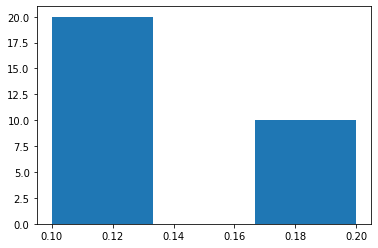

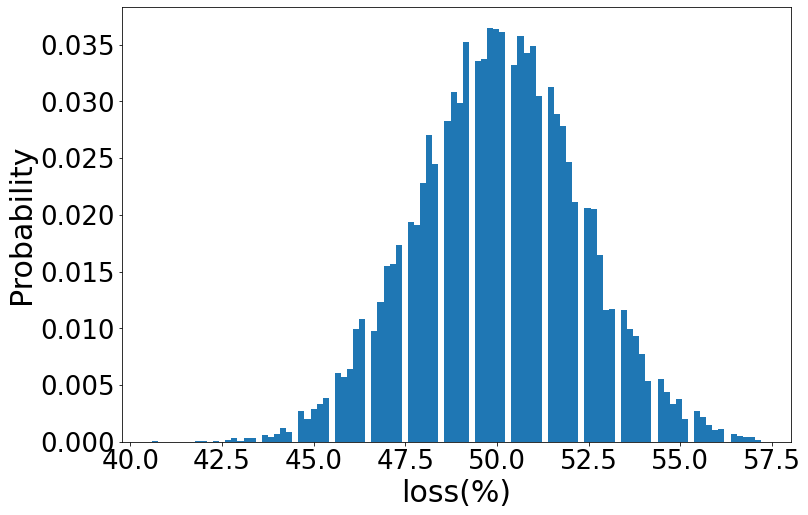

In [95]:
import numpy as np
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 1, figsize=(12,8))

#设置坐标标签标注和字体大小
plt.xlabel("loss(%)",fontsize=30)
plt.ylabel("Probability",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

loss_mean = 0.5
s = get_loss_distribution(loss_mean)


weights = np.ones_like(s)/float(len(s))
count, bins, ignored = plt.hist(s, bins=100, weights=weights)

# plt.plot(bins[:-1], count, linewidth=2, color='r')  
plt.savefig(f"./utils/figs/gilbert_{loss_mean}.png", bbox_inches = 'tight')
plt.show()

[138.98476917  48.69223976  47.52776748  45.62474198 165.05675999
  33.6314589   78.97838851 193.47320734 123.52842727]


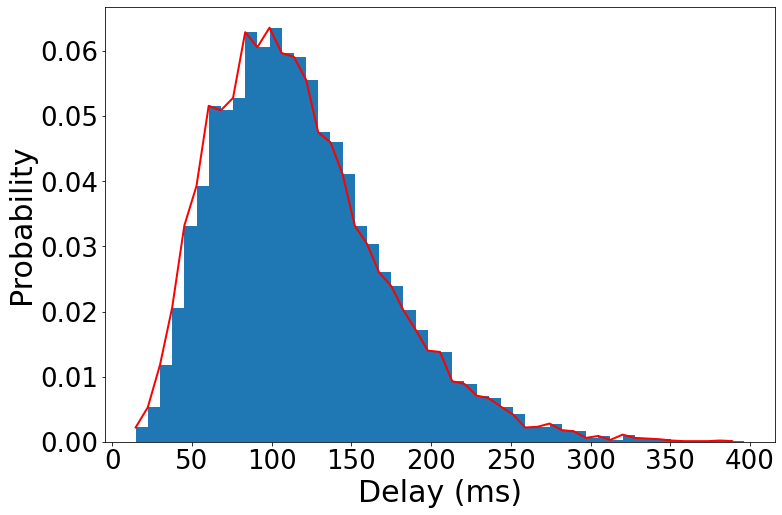

In [58]:
import numpy as np
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 1, figsize=(12,8))

#设置坐标标签标注和字体大小
plt.xlabel("Delay (ms)",fontsize=30)
plt.ylabel("Probability",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)


delay_mean = 120

 
shape = 5
scale = delay_mean/shape
s = np.random.gamma(shape,scale,10000)

print(s[1:10])
weights = np.ones_like(s)/float(len(s))
count, bins, ignored = plt.hist(s, 50, weights=weights)
plt.plot(bins[:-1], count, linewidth=2, color='r')  
plt.savefig(f"./utils/figs/gamma_{delay_mean}.png", bbox_inches = 'tight')
plt.show()